Calculating DFT Matrix:
------------------------

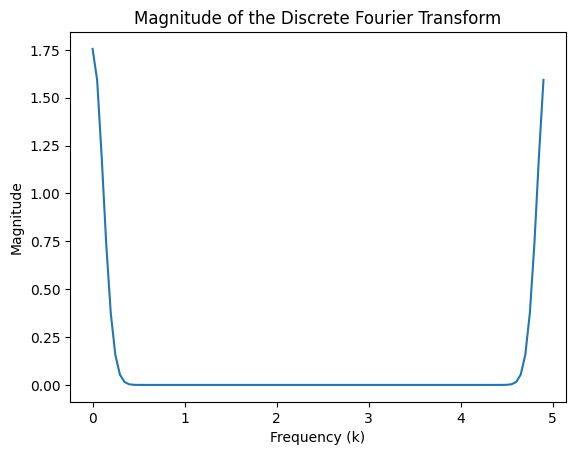

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.exp(-x**2)
n=100
xp=np.linspace(-5,5,n)
f_xp=f(xp)

#Calculatinf DFT matrix
A=np.zeros((n,n),dtype=np.complex128)
A = np.zeros((n, n), dtype=np.complex128)


def DFT(n):
    w=np.exp(2j*np.pi/n)
    for i in range(n):
        for j in range(n):
            A[i,j]=w**(i*j)

    A/=np.sqrt(n)
    return A
dft_matrix=DFT(n)
f_kq=np.dot(dft_matrix,f_xp)

# Calculate the sampling rate and Nyquist frequency
dx = xp[1] - xp[0]
fs = 1 / dx
f_nyquist = fs / 2

# Calculate the frequency values (k-points)
k_points = np.arange(n) / n * f_nyquist
plt.plot(k_points,f_kq)




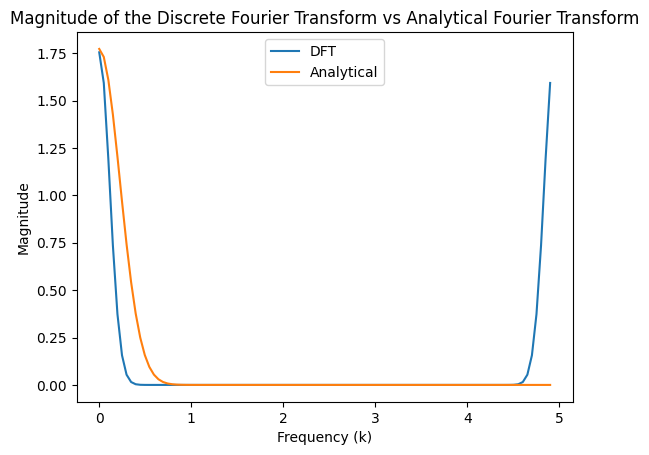

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2)

def gaussian_ft(xi):
    return np.sqrt(np.pi) * np.exp(-np.pi**2 * xi**2)

n = 100
xp = np.linspace(-5, 5, n)
f_xp = f(xp)

# Calculate DFT matrix
def DFT(n):
    A = np.zeros((n, n), dtype=np.complex128)
    w = np.exp(2j * np.pi / n)
    for i in range(n):
        for j in range(n):
            A[i, j] = w**(i * j)
    A /= np.sqrt(n)
    return A

dft_matrix = DFT(n)
f_kq = np.dot(dft_matrix, f_xp)

# Calculate the sampling rate and Nyquist frequency
dx = xp[1] - xp[0]
fs = 1 / dx
f_nyquist = fs / 2

# Calculate the frequency values (k-points)
k_points = np.arange(n) / n * f_nyquist

# Calculate the analytical Fourier Transform of the Gaussian function
analytical_ft = gaussian_ft(k_points)

# Plotting the results
plt.plot(k_points, np.abs(f_kq), label='DFT')
plt.plot(k_points, np.abs(analytical_ft), label='Analytical')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.title('Magnitude of the Discrete Fourier Transform vs Analytical Fourier Transform')
plt.legend()
plt.show()


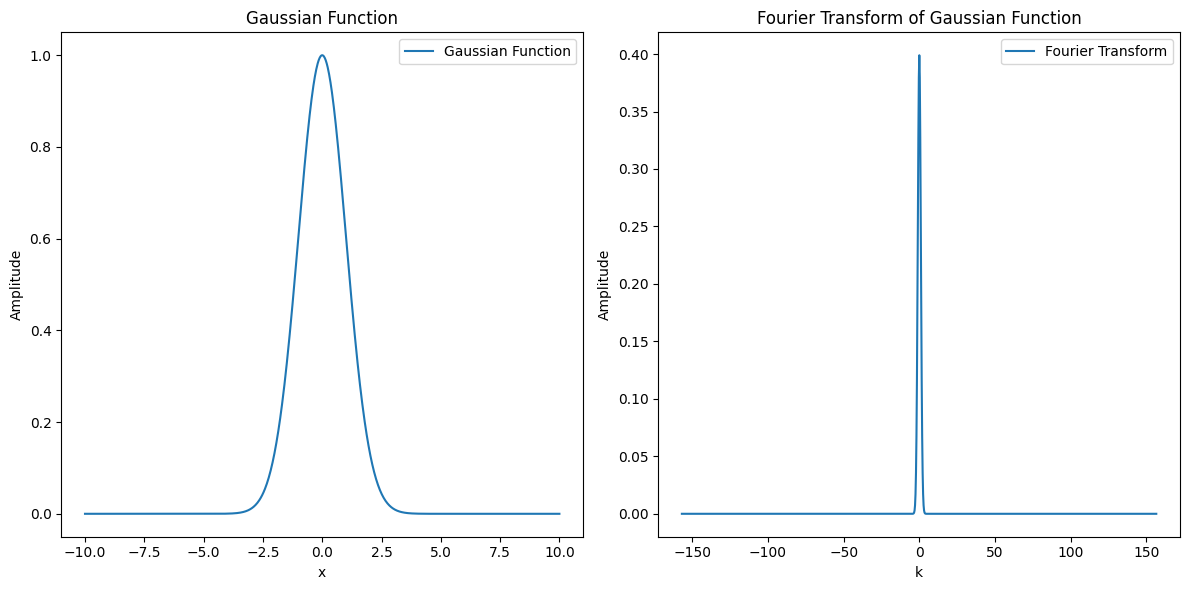

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

def fourier_transform(x, y):
    N = len(x)
    delta_x = x[1] - x[0]
    k = 2 * np.pi * np.fft.fftfreq(N, delta_x)
    delta_k = k[1] - k[0]
    y_ft = np.fft.fft(y)
    y_ft = np.fft.fftshift(y_ft)
    k = np.fft.fftshift(k)
    return k, y_ft * delta_x / (2 * np.pi)

# Parameters for the Gaussian
mu = 0.0
sigma = 1.0
x_min = -10
x_max = 10
N = 1000

# Generate the x values
x = np.linspace(x_min, x_max, N)

# Compute the Gaussian function
y = gaussian(x, mu, sigma)

# Compute the Fourier transform
k, y_ft = fourier_transform(x, y)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='Gaussian Function')
plt.title('Gaussian Function')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k, np.abs(y_ft), label='Fourier Transform')
plt.title('Fourier Transform of Gaussian Function')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
